# 1. Simple Approach - Naive Bayes

#### 1.1 Load Data

In [4]:
import pandas as pd

df = pd.read_csv('../data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 1.2 Convert target to Bool

In [5]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

#### 1.3 Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)


#### 1.4 Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

#### 1.5 Train Model

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

#### 1.6 Perform Predictions

In [9]:
y_pred = pipeline.predict(X_test)

#### 1.7 Evaluate Model Predictions

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.96
Precision: 1.00
Recall: 0.72
F1 Score: 0.84


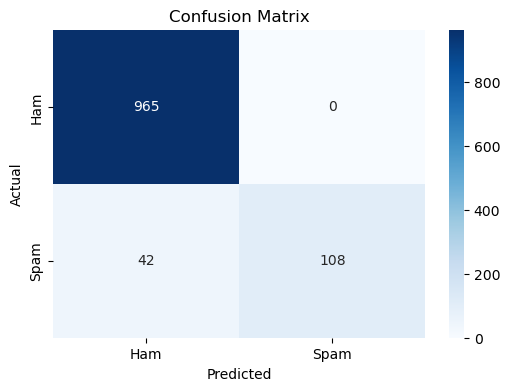

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 2. SMOTE Approach - Naive Bayes

#### 2.1 Load Data

In [16]:
import pandas as pd

df = pd.read_csv('../data/spam.csv', encoding='latin-1')

#### 2.2 Convert Target to Bool

In [17]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

#### 2.3 Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

#### 2.4 Pipeline + SMOTE

In [19]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

pipeline = ImbPipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', MultinomialNB())
])

#### 2.5 Train Model

In [ ]:
pipeline.fit(X_train, y_train)

#### 2.6 Perform Predictions

In [ ]:
y_pred = pipeline.predict(X_test)

#### 2.7 Evaluate Predictions

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.97
Precision: 0.89
Recall: 0.91
F1 Score: 0.90


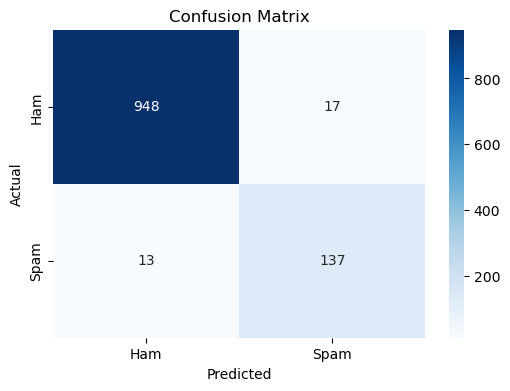

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 3. Local Language Model Approach - DistilBert

c:\Users\diogo\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/837 [00:00<?, ?it/s]

{'loss': 0.7097, 'grad_norm': 3.895876884460449, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.04}
{'loss': 0.6997, 'grad_norm': 3.7295889854431152, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.07}
{'loss': 0.6572, 'grad_norm': 3.4864940643310547, 'learning_rate': 3e-06, 'epoch': 0.11}
{'loss': 0.6048, 'grad_norm': 2.3775651454925537, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.14}
{'loss': 0.5323, 'grad_norm': 2.9786455631256104, 'learning_rate': 5e-06, 'epoch': 0.18}
{'loss': 0.3747, 'grad_norm': 2.6683695316314697, 'learning_rate': 6e-06, 'epoch': 0.22}
{'loss': 0.3446, 'grad_norm': 2.394798994064331, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.25}
{'loss': 0.1914, 'grad_norm': 1.361020803451538, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.29}
{'loss': 0.1544, 'grad_norm': 3.8314921855926514, 'learning_rate': 9e-06, 'epoch': 0.32}
{'loss': 0.1442, 'grad_norm': 1.9693610668182373, 'learning_rate': 1e-05, 'epoch': 0.36}
{'loss': 0.0725, 'grad_norm': 1

  0%|          | 0/70 [00:00<?, ?it/s]

{'eval_loss': 0.05369129776954651, 'eval_accuracy': 0.9874439461883409, 'eval_precision': 0.9927536231884058, 'eval_recall': 0.9133333333333333, 'eval_f1': 0.9513888888888888, 'eval_runtime': 52.5662, 'eval_samples_per_second': 21.211, 'eval_steps_per_second': 1.332, 'epoch': 1.0}
{'loss': 0.003, 'grad_norm': 0.045490801334381104, 'learning_rate': 2.8000000000000003e-05, 'epoch': 1.0}
{'loss': 0.0356, 'grad_norm': 0.6423770785331726, 'learning_rate': 2.9e-05, 'epoch': 1.04}
{'loss': 0.0021, 'grad_norm': 0.03351730480790138, 'learning_rate': 3e-05, 'epoch': 1.08}
{'loss': 0.0355, 'grad_norm': 0.03347598761320114, 'learning_rate': 3.1e-05, 'epoch': 1.11}
{'loss': 0.0357, 'grad_norm': 0.36861759424209595, 'learning_rate': 3.2000000000000005e-05, 'epoch': 1.15}
{'loss': 0.0036, 'grad_norm': 0.02568436600267887, 'learning_rate': 3.3e-05, 'epoch': 1.18}
{'loss': 0.0713, 'grad_norm': 0.029084142297506332, 'learning_rate': 3.4000000000000007e-05, 'epoch': 1.22}
{'loss': 0.0073, 'grad_norm': 9.

  0%|          | 0/70 [00:00<?, ?it/s]

{'eval_loss': 0.03564348444342613, 'eval_accuracy': 0.9946188340807175, 'eval_precision': 1.0, 'eval_recall': 0.96, 'eval_f1': 0.9795918367346939, 'eval_runtime': 48.2263, 'eval_samples_per_second': 23.12, 'eval_steps_per_second': 1.451, 'epoch': 2.0}
{'loss': 0.0418, 'grad_norm': 0.05154809355735779, 'learning_rate': 4.109792284866469e-05, 'epoch': 2.01}
{'loss': 0.0284, 'grad_norm': 0.031190399080514908, 'learning_rate': 3.961424332344214e-05, 'epoch': 2.04}
{'loss': 0.0027, 'grad_norm': 0.2640504539012909, 'learning_rate': 3.8130563798219586e-05, 'epoch': 2.08}
{'loss': 0.0588, 'grad_norm': 3.353166103363037, 'learning_rate': 3.664688427299703e-05, 'epoch': 2.11}
{'loss': 0.0016, 'grad_norm': 0.0422087237238884, 'learning_rate': 3.516320474777448e-05, 'epoch': 2.15}
{'loss': 0.0016, 'grad_norm': 0.018261384218931198, 'learning_rate': 3.3679525222551934e-05, 'epoch': 2.19}
{'loss': 0.0017, 'grad_norm': 0.016455428674817085, 'learning_rate': 3.219584569732938e-05, 'epoch': 2.22}
{'los

  0%|          | 0/70 [00:00<?, ?it/s]

{'eval_loss': 0.029717186465859413, 'eval_accuracy': 0.9946188340807175, 'eval_precision': 0.9864864864864865, 'eval_recall': 0.9733333333333334, 'eval_f1': 0.9798657718120806, 'eval_runtime': 48.6217, 'eval_samples_per_second': 22.932, 'eval_steps_per_second': 1.44, 'epoch': 3.0}
{'train_runtime': 2090.2339, 'train_samples_per_second': 6.397, 'train_steps_per_second': 0.4, 'train_loss': 0.08325055939715084, 'epoch': 3.0}


  0%|          | 0/70 [00:00<?, ?it/s]

Accuracy: 0.99
Precision: 0.99
Recall: 0.97
F1 Score: 0.98


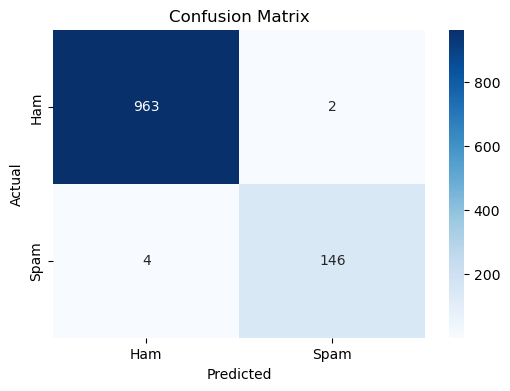

In [1]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader

# Custom Dataset class
class SpamDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Function to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Load dataset
df = pd.read_csv('../data/spam.csv', encoding='latin-1')

# Ensure target is binary
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Load pre-trained DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Prepare datasets
train_dataset = SpamDataset(X_train.values, y_train.values, tokenizer, max_len=64)
test_dataset = SpamDataset(X_test.values, y_test.values, tokenizer, max_len=64)

# Load pre-trained DistilBERT model with a classification head
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model on the test set
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
